In [1]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns

In [2]:
df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")

In [3]:
df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()



df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL" ])

Number of clusters: 3
Silhouette Coefficient: 0.251


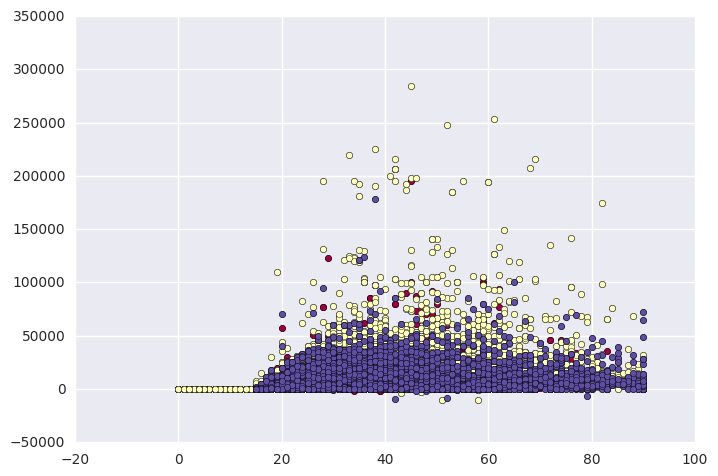

In [5]:
X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)


n_clusters = 3

#labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)

labels = AgglomerativeClustering(n_clusters).fit_predict(X_db)


print('Number of clusters: %d' % n_clusters)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')
    
plt.savefig("clusters")


In [ ]:
a = sns.pairplot(df_demo)
a = sns_plot.get_figure()
a.savefig("pairplot.png")

Number of clusters: 2
Silhouette Coefficient: 0.369


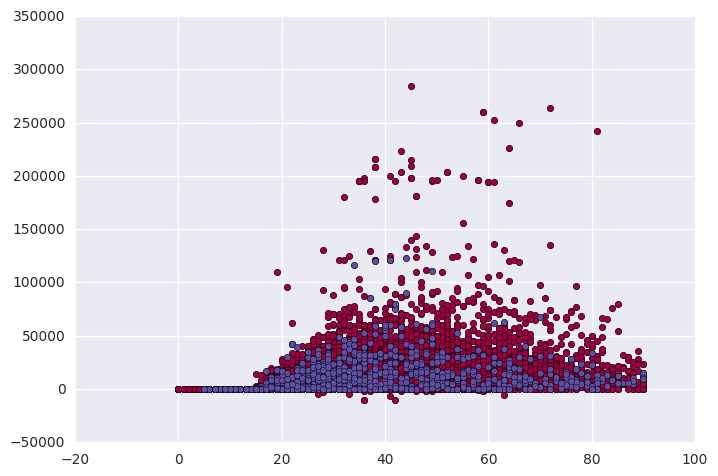

Number of clusters: 3
Silhouette Coefficient: 0.250


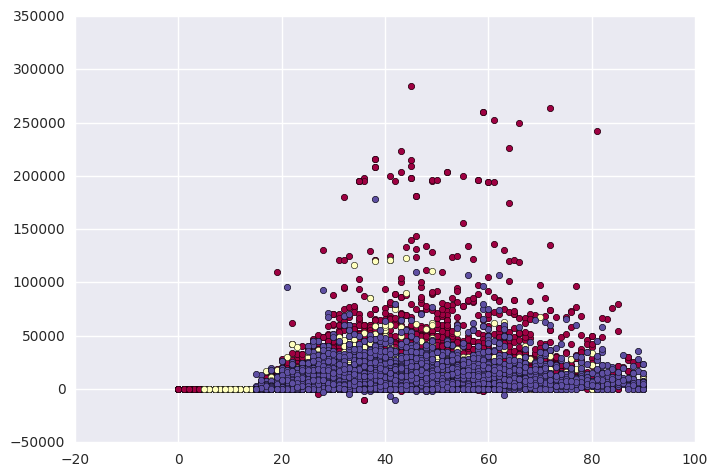

Number of clusters: 4
Silhouette Coefficient: 0.175


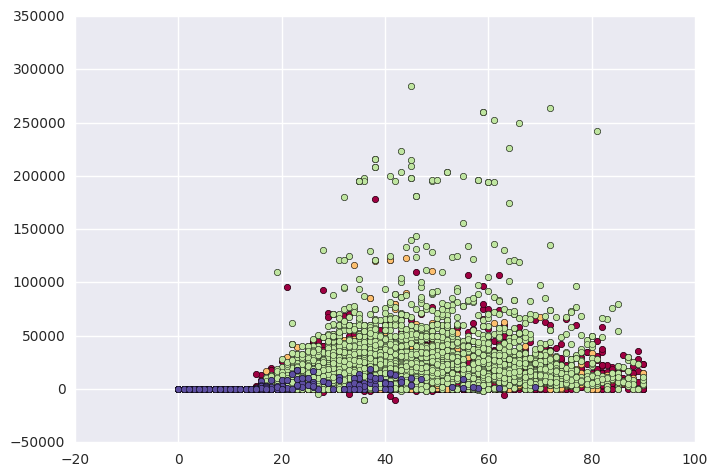

Number of clusters: 5
Silhouette Coefficient: 0.205


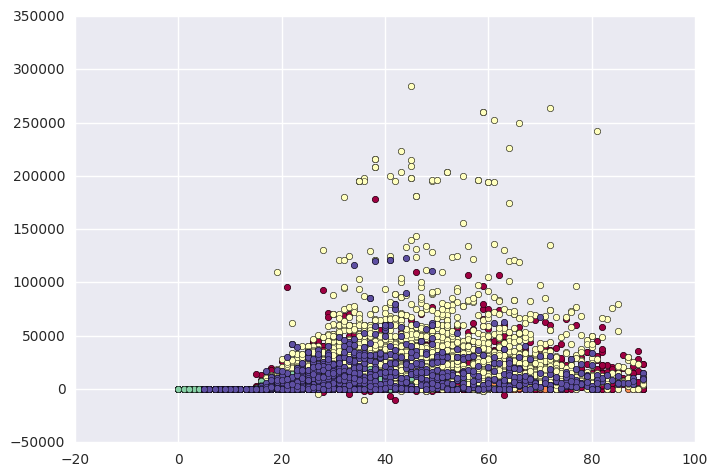

Number of clusters: 6
Silhouette Coefficient: 0.278


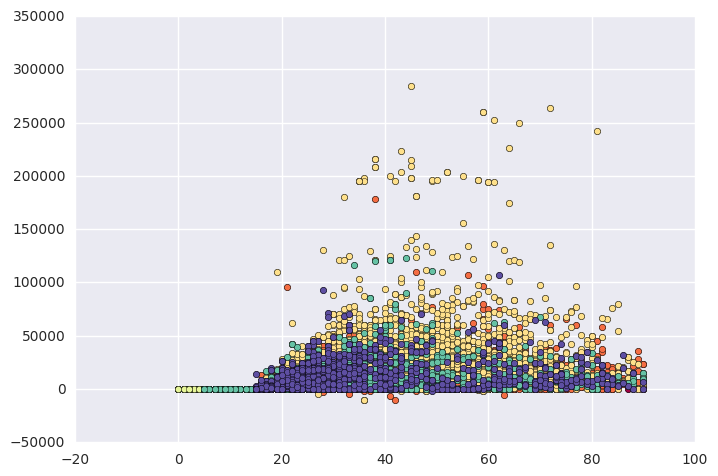

Number of clusters: 7
Silhouette Coefficient: 0.282


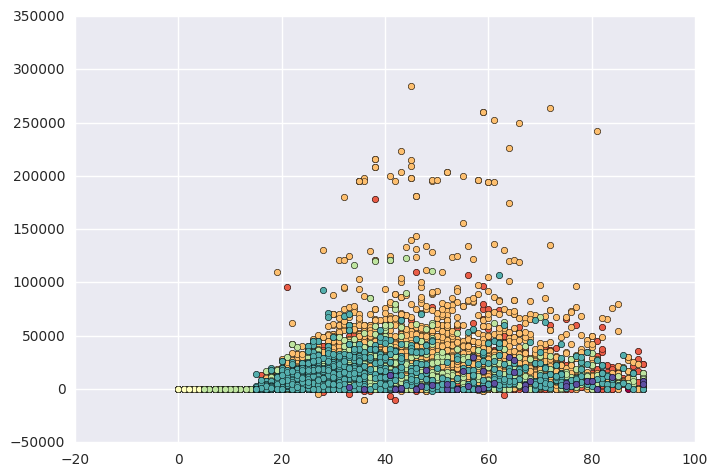

Number of clusters: 8
Silhouette Coefficient: 0.284


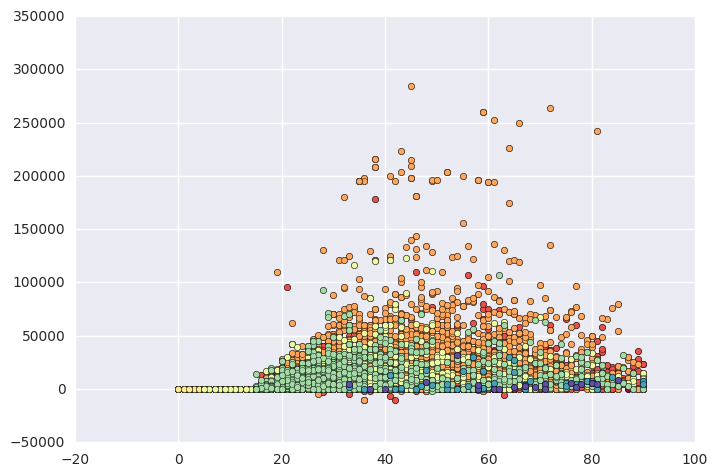

Number of clusters: 9
Silhouette Coefficient: 0.286


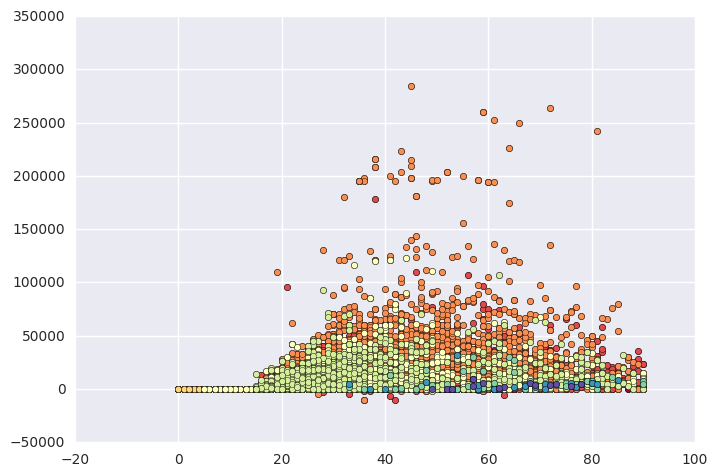

Number of clusters: 10
Silhouette Coefficient: 0.287


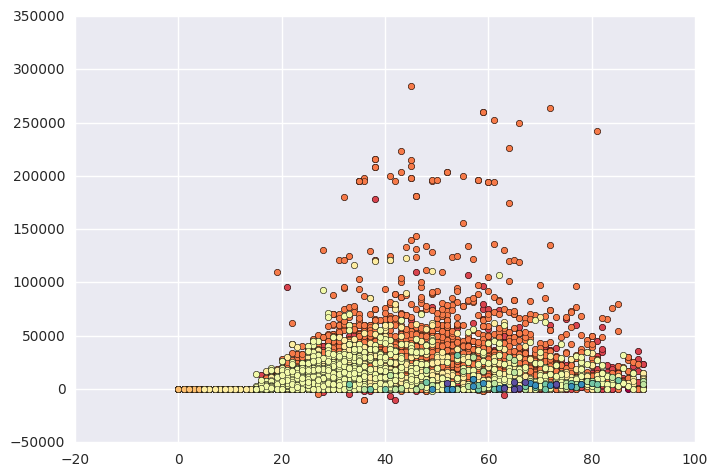

In [6]:
#X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)

for n in range(2, 11):
    n_clusters = n

    #labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)

    labels = AgglomerativeClustering(n_clusters).fit_predict(X_db)


    print('Number of clusters: %d' % n_clusters)

    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X_db, labels))

    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')
    plt.show()